## =====================================================
## Exploratory Data Analysis (EDA)
## Projet : Alphabétisation et Développement en Afrique
## Auteur : Salimata TOGO
## =====================================================

In [108]:


# Import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# =====================================================
# 1. Chargement des données
# =====================================================

In [109]:
# Le fichier CSV a été généré à l'étape précédente
df = pd.read_csv("../data/Africa_Education_Development.csv")

# Dimensions du dataset
print("Dimensions du dataset :", df.shape)

# Liste des colonnes disponibles
print("Colonnes :", df.columns)

# Aperçu des premières lignes
df.head()

Dimensions du dataset : (1272, 15)
Colonnes : Index(['Country Name', 'Country Code', 'Year', 'Literacy_Female_Adult',
       'Literacy_Male_Adult', 'Literacy_Female_Youth', 'Literacy_Male_Youth',
       'GDP_per_capita', 'Education_Expenditure', 'Urban_Population',
       'Poverty', 'Child_Marriage_Under18', 'Child_Marriage_Under15',
       'Net_Migration', 'Fertility_Rate'],
      dtype='object')


,Country Name,Country Code,Year,Literacy_Female_Adult,Literacy_Male_Adult,Literacy_Female_Youth,Literacy_Male_Youth,GDP_per_capita,Education_Expenditure,Urban_Population,Poverty,Child_Marriage_Under18,Child_Marriage_Under15,Net_Migration,Fertility_Rate
0,Algeria,DZA,2000.0,NaN,NaN,NaN,NaN,3553.324205,NaN,59.919,NaN,NaN,NaN,-16454.0,2.590
1,Algeria,DZA,2001.0,NaN,NaN,NaN,NaN,3610.006056,NaN,60.712,NaN,NaN,NaN,-26539.0,2.519
2,Algeria,DZA,2002.0,60.0,79.0,86.0,94.0,3754.660815,NaN,61.501,NaN,NaN,NaN,-36255.0,2.429
3,Algeria,DZA,2003.0,NaN,NaN,NaN,NaN,3945.898161,NaN,62.284,NaN,NaN,NaN,-39421.0,2.451
4,Algeria,DZA,2004.0,NaN,NaN,NaN,NaN,4066.282048,NaN,63.061,NaN,NaN,NaN,-38648.0,2.500


# =====================================================
# 2. Vérification des valeurs manquantes
# =====================================================

Pourcentage de valeurs manquantes :
Child_Marriage_Under15    88.286164
Child_Marriage_Under18    88.286164
Poverty                   85.062893
Literacy_Male_Adult       79.166667
Literacy_Female_Adult     78.930818
Literacy_Male_Youth       77.515723
Literacy_Female_Youth     75.235849
Education_Expenditure     31.525157
GDP_per_capita             3.223270
Year                       0.000000
Country Name               0.000000
Country Code               0.000000
Urban_Population           0.000000
Net_Migration              0.000000
Fertility_Rate             0.000000
dtype: float64


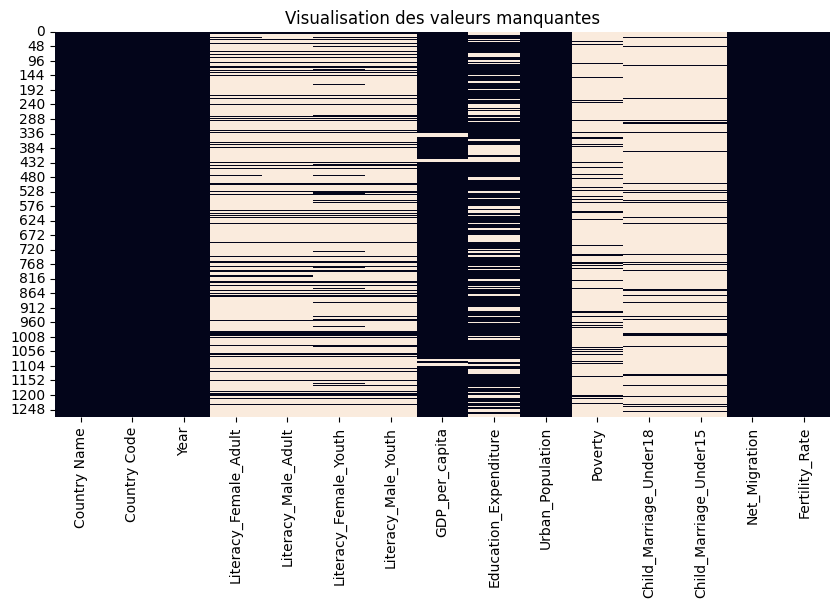

In [110]:
missing = df.isna().mean().sort_values(ascending=False) * 100
print("Pourcentage de valeurs manquantes :")
print(missing)

# Visualisation des valeurs manquantes
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Visualisation des valeurs manquantes")
plt.show()

Analyse des valeurs manquantes

L’examen du pourcentage de valeurs manquantes met en évidence une forte hétérogénéité dans la disponibilité des données selon les indicateurs :

Indicateurs très incomplets (>75 % de valeurs manquantes)

Child_Marriage_Under15 (88 %) et Child_Marriage_Under18 (88 %) : les données sur le mariage précoce sont très limitées. Elles proviennent d’enquêtes ponctuelles (DHS, MICS, UNICEF) qui ne sont pas réalisées chaque année ni dans tous les pays.

Poverty (85 %) : le taux de pauvreté est également peu disponible, car il repose sur des enquêtes nationales de consommation rarement mises à jour.

Les taux d’alphabétisation (Literacy_Male_Adult, Literacy_Female_Adult, Literacy_Male_Youth, Literacy_Female_Youth) présentent entre 75 % et 79 % de données manquantes. Cela reflète la difficulté de disposer d’estimations annuelles pour ces indicateurs, souvent produits lors de recensements ou d’enquêtes décennales.

Indicateur moyennement disponible (~30 % de valeurs manquantes)

Education_Expenditure (31 %) : les dépenses publiques d’éducation en % du PIB sont mieux suivies que les indicateurs précédents, mais restent incomplètes car certains pays ne publient pas leurs budgets éducatifs chaque année.

Indicateurs bien couverts (<5 % de valeurs manquantes)

GDP_per_capita (3 %) : les données économiques sont relativement complètes grâce au suivi régulier par la Banque mondiale et le FMI.

Urban_Population, Net_Migration, Fertility_Rate (0 %) : ces indicateurs sont totalement renseignés, car ils proviennent de séries démographiques et économiques globales, souvent modélisées ou estimées pour combler les manques.

Variables structurelles (0 % de valeurs manquantes)

Year, Country Name, Country Code : ces colonnes descriptives ne présentent aucun problème.


## =====================================================
## Pays avec le plus de données manquantes
## =====================================================

Pourcentage moyen de valeurs manquantes par pays :
Country Name
Libya                       66.666667
South Sudan                 65.277778
Eritrea                     63.888889
Djibouti                    63.194444
Equatorial Guinea           62.847222
Botswana                    58.333333
Sudan                       57.986111
Guinea-Bissau               57.291667
Comoros                     56.944444
Seychelles                  55.208333
Liberia                     55.208333
Gabon                       54.861111
Zimbabwe                    54.861111
Algeria                     54.513889
Congo, Rep.                 53.819444
Angola                      53.472222
Cabo Verde                  53.125000
Congo, Dem. Rep.            51.041667
Morocco                     50.694444
Malawi                      50.347222
Central African Republic    50.347222
Sao Tome and Principe       50.000000
Eswatini                    49.652778
Niger                       49.652778
Namibia                 

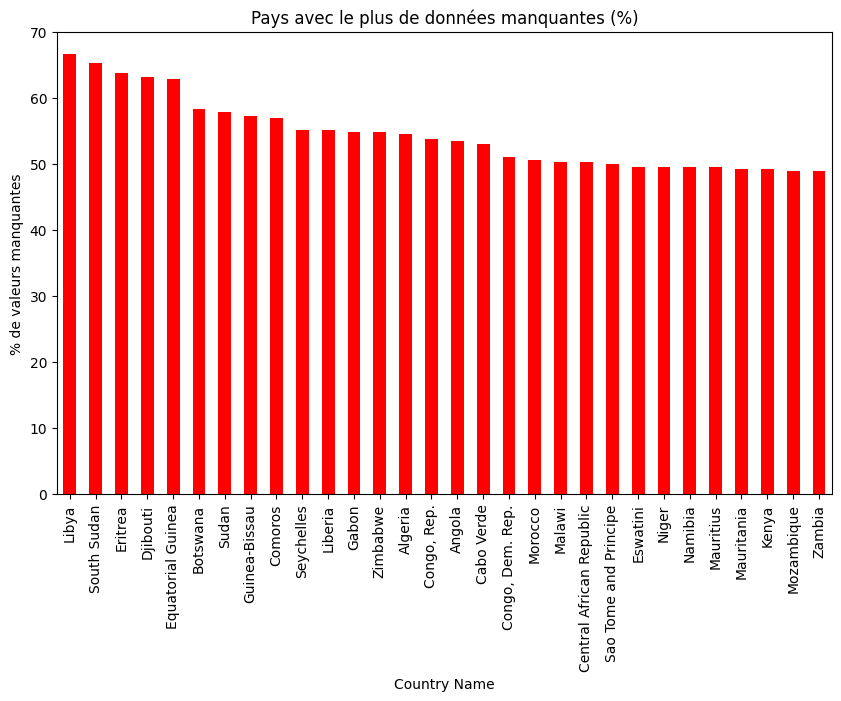

In [111]:
# Nombre de colonnes numériques (hors pays/code/année)
indicators = [col for col in df.columns if col not in ["Country Name", "Country Code", "Year"]]

# Pourcentage de NaN par pays
missing_by_country = df.groupby("Country Name")[indicators].apply(lambda x: x.isna().mean().mean()*100)
missing_by_country = missing_by_country.sort_values(ascending=False)

print("Pourcentage moyen de valeurs manquantes par pays :")
print(missing_by_country.head(30))  # les 15 pires

# Visualisation
plt.figure(figsize=(10,6))
missing_by_country.head(30).plot(kind="bar", color="red")
plt.title("Pays avec le plus de données manquantes (%)")
plt.ylabel("% de valeurs manquantes")
plt.show()


## =====================================================
## Années avec le plus de données manquantes
## =====================================================

Pourcentage moyen de valeurs manquantes par année :
Year
2023.0    64.150943
2001.0    57.232704
2003.0    56.132075
2004.0    55.188679
2002.0    55.188679
2009.0    54.559748
2007.0    53.616352
2008.0    52.987421
2005.0    52.515723
2006.0    52.044025
2020.0    51.572327
2017.0    51.572327
2013.0    51.257862
2016.0    50.786164
2011.0    49.213836
2019.0    48.113208
2021.0    47.798742
2015.0    47.169811
2000.0    45.440252
2014.0    44.968553
dtype: float64


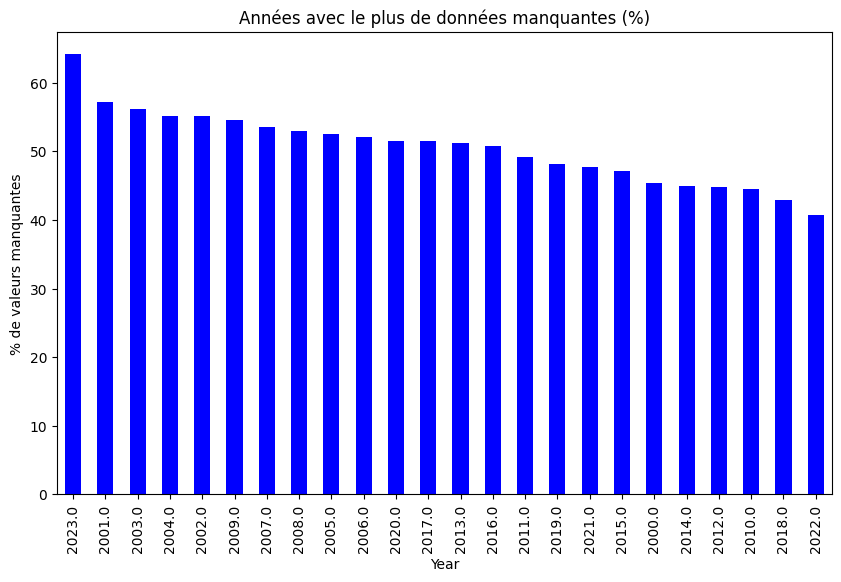

In [112]:
# Pourcentage de NaN par année
missing_by_year = df.groupby("Year")[indicators].apply(lambda x: x.isna().mean().mean()*100)
missing_by_year = missing_by_year.sort_values(ascending=False)

print("Pourcentage moyen de valeurs manquantes par année :")
print(missing_by_year.head(20))  # les 10 pires années

# Visualisation
plt.figure(figsize=(10,6))
missing_by_year.plot(kind="bar", color="blue")
plt.title("Années avec le plus de données manquantes (%)")
plt.ylabel("% de valeurs manquantes")
plt.show()


In [113]:
# Créer une copie de travail
df_clean = df.copy()


In [114]:
# Identifier les pays trop incomplets

# Liste des colonnes numériques à analyser
indicators = [col for col in df_clean.columns if col not in ["Country Name", "Country Code", "Year"]]

# Pourcentage moyen de NaN par pays
missing_by_country = df_clean.groupby("Country Name")[indicators].apply(lambda x: x.isna().mean().mean()*100)

# Pays à exclure (plus de 50% de NaN en moyenne)
countries_to_drop = missing_by_country[missing_by_country > 50].index.tolist()

print("Pays avec >50% de valeurs manquantes :", countries_to_drop)
print("Nombre de pays exclus :", len(countries_to_drop))


Pays avec >50% de valeurs manquantes : ['Algeria', 'Angola', 'Botswana', 'Cabo Verde', 'Central African Republic', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Guinea-Bissau', 'Liberia', 'Libya', 'Malawi', 'Morocco', 'Sao Tome and Principe', 'Seychelles', 'South Sudan', 'Sudan', 'Zimbabwe']
Nombre de pays exclus : 22


In [115]:
# Créer un nouveau DataFrame sans ces pays
df_filtered = df_clean[~df_clean["Country Name"].isin(countries_to_drop)]
print("Dimensions avant nettoyage :", df_clean.shape)
print("Dimensions après nettoyage :", df_filtered.shape)


Dimensions avant nettoyage : (1272, 15)
Dimensions après nettoyage : (744, 15)


## Justification du filtrage des pays

Afin d’améliorer la qualité de l’analyse, nous avons appliqué un premier filtrage sur les pays. Les pays présentant plus de 50 % de valeurs manquantes en moyenne sur l’ensemble des indicateurs ont été exclus du jeu de données nettoyé. Cette approche permet de se concentrer sur un échantillon de pays disposant d’informations suffisamment fiables et exploitables, tout en conservant le dataset brut pour référence.

In [116]:
# Vérifier les années
# Pourcentage moyen de NaN par année
missing_by_year = df_filtered.groupby("Year")[indicators].apply(lambda x: x.isna().mean().mean()*100)

print("Pourcentage moyen de valeurs manquantes par année :")
print(missing_by_year.sort_values(ascending=False).head(15))


Pourcentage moyen de valeurs manquantes par année :
Year
2023.0    62.365591
2001.0    54.301075
2002.0    53.494624
2008.0    52.150538
2004.0    51.344086
2003.0    50.806452
2009.0    50.806452
2007.0    49.193548
2020.0    48.118280
2013.0    47.849462
2019.0    46.774194
2006.0    46.505376
2017.0    46.505376
2005.0    45.967742
2016.0    45.698925
dtype: float64


## =====================================================
## Interpolation
## =====================================================

In [117]:
# Colonnes numériques (tous les indicateurs)
indicators = [col for col in df_clean.columns if col not in ["Country Name", "Country Code", "Year"]]

# Conversion forcée en float (même si certaines colonnes ont été mal lues)
for col in indicators:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Vérif des types
print(df_clean.dtypes)

# =====================================================
# Interpolation par pays
# =====================================================
df_interpolated = (
    df_clean.groupby("Country Name", group_keys=False).apply(
        lambda g: g.sort_values("Year")[["Year"] + indicators].interpolate(method="linear").assign(
            **{"Country Name": g["Country Name"].values,
               "Country Code": g["Country Code"].values}
        )
    )
)


# Filtrer sur 2006–2022
df_final = df_interpolated[(df_interpolated["Year"] >= 2006) & (df_interpolated["Year"] <= 2022)]

# Sauvegarde
output_path = "../data/Africa_Education_Development_Final.csv"
df_final.to_csv(output_path, index=False)

print("Dataset final sauvegardé :", output_path)

Country Name               object
Country Code               object
Year                      float64
Literacy_Female_Adult     float64
Literacy_Male_Adult       float64
Literacy_Female_Youth     float64
Literacy_Male_Youth       float64
GDP_per_capita            float64
Education_Expenditure     float64
Urban_Population          float64
Poverty                   float64
Child_Marriage_Under18    float64
Child_Marriage_Under15    float64
Net_Migration             float64
Fertility_Rate            float64
dtype: object
Dataset final sauvegardé : ../data/Africa_Education_Development_Final.csv


C:\Users\salim\AppData\Local\Temp\ipykernel_26152\1778964969.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean.groupby("Country Name", group_keys=False).apply(


## Qu’est-ce que l’interpolation ?
L’interpolation, c’est une méthode pour estimer une valeur manquante entre deux valeurs connues dans une série temporelle.

Exemple simple :

Alphabétisation femmes adultes = 40 % en 2008, 60 % en 2010.

En 2009 (valeur manquante), l’interpolation linéaire va estimer 50 %.

In [118]:
# Pourcentage de NaN par pays
missing_by_country_final = df_final.groupby("Country Name")[indicators].apply(lambda x: x.isna().mean().mean()*100)
missing_by_country_final = missing_by_country_final.sort_values(ascending=False)

print("Pourcentage moyen de valeurs manquantes par pays :")
print(missing_by_country_final.head(30))  # les 15 pires


Pourcentage moyen de valeurs manquantes par pays :
Country Name
Libya                       66.666667
Djibouti                    41.176471
Equatorial Guinea           21.078431
Mauritius                   16.666667
Botswana                    16.666667
Seychelles                  16.666667
Algeria                     16.176471
Guinea-Bissau               14.705882
Central African Republic    13.725490
Zimbabwe                    13.235294
South Sudan                 12.254902
Gabon                       11.764706
Cabo Verde                  11.764706
Tunisia                     11.764706
South Africa                11.764706
Angola                       9.803922
Sudan                        9.313725
Eritrea                      8.333333
Togo                         7.843137
Gambia, The                  6.862745
Comoros                      5.882353
Malawi                       5.882353
Liberia                      4.411765
Burundi                      3.921569
Congo, Dem. Rep.        

### Remarque
Après nettoyage, plusieurs pays présentent une complétude quasi totale (0 % de valeurs manquantes), notamment l’Égypte, la Côte d’Ivoire, le Mali, le Cameroun, le Ghana, l’Éthiopie, la Tanzanie, l’Ouganda et la Zambie.
En revanche, certains pays restent très incomplets (Libye, Djibouti, Guinée équatoriale) et sont exclus des analyses principales.

In [119]:
missing_by_country_final = missing_by_country_final.sort_values(ascending=False)


In [120]:
# 30 pays avec le moins de valeurs manquantes
best_30 = missing_by_country_final.tail(30)  # prend les 20 derniers (donc les meilleurs)

print("30 pays avec le moins de valeurs manquantes :")
print(best_20)

30 pays avec le moins de valeurs manquantes :
Country Name
Tunisia                  11.764706
South Africa             11.764706
Angola                    9.803922
Sudan                     9.313725
Eritrea                   8.333333
Togo                      7.843137
Gambia, The               6.862745
Comoros                   5.882353
Malawi                    5.882353
Liberia                   4.411765
Burundi                   3.921569
Congo, Dem. Rep.          2.941176
Sao Tome and Principe     2.941176
Sierra Leone              1.960784
Nigeria                   1.960784
Morocco                   0.980392
Eswatini                  0.980392
Egypt, Arab Rep.          0.000000
Cote d'Ivoire             0.000000
Congo, Rep.               0.000000
Chad                      0.000000
Cameroon                  0.000000
Benin                     0.000000
Burkina Faso              0.000000
Ethiopia                  0.000000
Namibia                   0.000000
Mali                      0.000

In [121]:
import pandas as pd

# Charger le dataset final déjà nettoyé
df_final = pd.read_csv("../data/Africa_Education_Development_Final.csv")

# Colonnes numériques
indicators = [col for col in df_final.columns if col not in ["Country Name", "Country Code", "Year"]]

# Calcul du % de NaN par pays
missing_by_country_final = df_final.groupby("Country Name")[indicators].apply(
    lambda x: x.isna().mean().mean()*100
)

# Sélection des 30 pays les plus complets
top_30_countries = missing_by_country_final.nsmallest(30)

# Conversion en DataFrame pour un tableau clair
top_30_table = top_30_countries.reset_index()
top_30_table.columns = ["Country Name", "Missing_Percentage"]

# Affichage
print(top_30_table)

# Sauvegarde en CSV pour usage dans le rapport
output_path = "../data/Top30_Countries_MissingValues.csv"
top_30_table.to_csv(output_path, index=False)
print(f" Tableau des 30 pays sauvegardé : {output_path}")


             Country Name  Missing_Percentage
0                   Benin            0.000000
1            Burkina Faso            0.000000
2                Cameroon            0.000000
3                    Chad            0.000000
4             Congo, Rep.            0.000000
5           Cote d'Ivoire            0.000000
6        Egypt, Arab Rep.            0.000000
7                Ethiopia            0.000000
8                   Ghana            0.000000
9                  Guinea            0.000000
10                  Kenya            0.000000
11                Lesotho            0.000000
12             Madagascar            0.000000
13                   Mali            0.000000
14             Mauritania            0.000000
15             Mozambique            0.000000
16                Namibia            0.000000
17                  Niger            0.000000
18                 Rwanda            0.000000
19                Senegal            0.000000
20               Tanzania         

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger le dataset (top 30 pays)
df_top30 = pd.read_csv("../data/Africa_Education_Development_Top30.csv")

# Colonnes numériques
indicators = [col for col in df_top30.columns if col not in ["Country Name", "Country Code", "Year"]]

# =====================================================
# 1. Préparer des caractéristiques moyennes par pays
# =====================================================
country_profiles = df_top30.groupby("Country Name")[indicators].mean()

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_profiles)

# =====================================================
# 2. Clustering avec K-Means
# =====================================================
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter le cluster à chaque pays
country_profiles["Cluster"] = clusters
print(country_profiles[["Cluster"]].head())


              Cluster
Country Name         
Benin               3
Burkina Faso        3
Burundi             2
Cameroon            2
Chad                1


## Fonction d’imputation par cluster

In [123]:
# =====================================================
# 3. Fonction d’imputation par cluster
# =====================================================
df_clustered = df_top30.copy()

# Ajouter info cluster à chaque ligne
df_clustered = df_clustered.merge(country_profiles["Cluster"], on="Country Name")

# Remplacer NaN par la médiane du cluster
for col in indicators:
    df_clustered[col] = df_clustered.groupby("Cluster")[col].transform(
        lambda x: x.fillna(x.median())
    )

# Vérif
print("Valeurs manquantes restantes :", df_clustered.isna().sum().sum())

# Sauvegarde
output_path = "../data/Africa_Education_Development_Top30_ClusterImputed.csv"
df_clustered.to_csv(output_path, index=False)
print(f"Dataset final imputé par cluster sauvegardé : {output_path}")


Valeurs manquantes restantes : 0
Dataset final imputé par cluster sauvegardé : ../data/Africa_Education_Development_Top30_ClusterImputed.csv


In [124]:
df_clustered.head()

,Year,Literacy_Female_Adult,Literacy_Male_Adult,Literacy_Female_Youth,Literacy_Male_Youth,GDP_per_capita,Education_Expenditure,Urban_Population,Poverty,Child_Marriage_Under18,Child_Marriage_Under15,Net_Migration,Fertility_Rate,Country Name,Country Code,Cluster
0,2006.0,18.442909,40.616169,30.786551,54.866940,900.620536,2.56340,41.049,69.7125,34.400000,7.900000,-15135.0,5.673,Benin,BEN,3
1,2007.0,19.051404,41.340184,32.478522,56.379270,926.740114,2.36331,41.558,69.4500,33.983333,8.333333,241.0,5.627,Benin,BEN,3
2,2008.0,19.659899,42.064199,34.170494,57.891600,943.203380,2.77728,42.069,69.1875,33.566667,8.766667,3198.0,5.548,Benin,BEN,3
3,2009.0,20.268394,42.788214,35.862466,59.403931,936.565651,3.08927,42.580,68.9250,33.150000,9.200000,4279.0,5.491,Benin,BEN,3
4,2010.0,20.876890,43.512229,37.554438,60.916261,928.246655,3.67997,43.093,68.6625,32.733333,9.633333,3947.0,5.452,Benin,BEN,3


## la clusterisation ?
Clustering (K-Means) :

On calcule un profil moyen pour chaque pays (ex. moyenne alphabétisation 2006–2022, PIB moyen, etc.).

On applique K-Means → ça regroupe les pays en “clusters” selon leurs similarités.

Exemple :

Cluster 1 = pays à faible alphabétisation et forte fécondité.

Cluster 2 = pays à alphabétisation forte et urbanisation élevée.

Imputation par médiane du cluster :

Si une valeur est manquante pour un pays, on la remplace par la médiane des pays de son cluster.

Exemple : si le Niger n’a pas de données en 2010, on prend la médiane des pays qui lui ressemblent (Mali, Burkina Faso…).


### Résumé du nettoyage et de la préparation des données

j’ai d’abord collecté les données de la Banque mondiale concernant l’alphabétisation (par sexe et tranche d’âge), le PIB par habitant, la pauvreté, l’urbanisation, les mariages précoces, la fécondité et les dépenses d’éducation. Les données couvrent l’Afrique sur la période 2000–2022.

Quand j’ai commencé l’exploration, j’ai rapidement constaté que certaines variables et certains pays comportaient beaucoup de valeurs manquantes. J’ai donc mené une analyse détaillée du taux de NaN par indicateur, par pays et par année.

À partir de là, j’ai pris plusieurs décisions :

J’ai supprimé les pays trop incomplets (plus de 50 % de valeurs manquantes, comme la Libye ou Djibouti).

J’ai limité la période aux années 2006–2022, car les années avant 2006 et 2023 étaient trop vides.

Ensuite, j’ai appliqué une interpolation linéaire pour combler les trous dans les séries temporelles de chaque pays. Cette méthode est efficace pour estimer une valeur manquante entre deux années connues, mais elle reste limitée si un pays n’a quasiment aucune donnée sur un indicateur.

Pour aller plus loin, j’ai mis en place une imputation avancée : la clusterisation des pays par K-Means.

J’ai regroupé les pays ayant des profils similaires (par exemple alphabétisation faible + fécondité élevée, ou alphabétisation forte + PIB élevé).

Ensuite, j’ai remplacé les valeurs manquantes d’un pays par la médiane de son cluster, ce qui est plus réaliste que d’utiliser une simple moyenne continentale.

Enfin, j’ai choisi de conserver uniquement les 30 pays les plus complets, ce qui donne un dataset propre, robuste et prêt pour l’analyse exploratoire, les visualisations interactives et la modélisation prédictive.